# **Proyek Analisis Sentimen**
- Nama : Idha Kurniawati
- Email : idhakurniawati03@gmail.com
- ID Dicoding : idhakt

# IMPORT LIBRARY

In [1]:
!pip install -U numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 gensim==4.3.3 scikit-learn==1.3.2 tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/7

In [42]:
!pip install --upgrade numpy
!pip install --upgrade gensim

# === LIBRARY UTAMA ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# === SKLEARN ===
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# === TENSORFLOW / DNN ===
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.4 which is incompatible.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.2.4 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 wh

# LOAD DATA

In [2]:
df = pd.read_csv('labeling_data.csv')

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopword,final_text,polarity_score,polarity
0,6ca5aa39-c6fa-448d-88a4-9eb6ea05e788,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya kembali memberikan bintang 1 (sebelumnya ...,1,54,6.50.8-86b0cb5048,2025-04-13 05:51:46,"Halo Kak, mohon maaf atas ketidaknyamanannya. ...",2025-04-13 06:29:45,6.50.8-86b0cb5048,Saya kembali memberikan bintang sebelumnya pe...,saya kembali memberikan bintang sebelumnya pe...,saya kembali memberikan bintang sebelumnya per...,"['saya', 'kembali', 'memberikan', 'bintang', '...","['bintang', 'bintang', 'tertipu', 'memilih', '...",bintang bintang tertipu memilih paket tabel in...,14,positive
1,d5defe6e-2080-4977-a0cd-0cb03a2aec13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"untuk yg mau berlangganan,suka download videon...",1,38,6.49.14-a8e70eb5b0,2025-04-14 22:17:43,"Halo, Kak. Mohon maaf atas ketidaknyamanannya,...",2025-04-15 00:01:39,6.49.14-a8e70eb5b0,untuk yg mau berlangganansuka download videony...,untuk yg mau berlangganansuka download videony...,untuk yang mau berlangganansuka download video...,"['untuk', 'yang', 'mau', 'berlangganansuka', '...","['berlangganansuka', 'download', 'videonya', '...",berlangganansuka download videonya nonton beri...,-7,negative
2,bc15a7d6-8ee6-4faa-981f-46b29c323588,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya beli paket platinum tapi di apk ( vidio )...,1,4,6.50.8-86b0cb5048,2025-04-15 17:24:44,Hallo Kak. Mohon maaf atas ketidaknyamanan nya...,2025-04-15 18:27:20,6.50.8-86b0cb5048,saya beli paket platinum tapi di apk vidio n...,saya beli paket platinum tapi di apk vidio n...,saya beli paket platinum tapi di apk vidio nya...,"['saya', 'beli', 'paket', 'platinum', 'tapi', ...","['beli', 'paket', 'platinum', 'apk', 'vidio', ...",beli paket platinum apk vidio bayar pdhl bayar...,-1,negative
3,4722f612-c604-4788-b209-66f020df3cb8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"iklan macam apa ini banyak banget,bg kalo bisa...",3,4,6.50.8-86b0cb5048,2025-04-14 23:26:27,"Halo, Kak. Mohon maaf atas ketidaknyamanannya,...",2025-04-15 00:01:49,6.50.8-86b0cb5048,iklan macam apa ini banyak bangetbg kalo bisa ...,iklan macam apa ini banyak bangetbg kalo bisa ...,iklan macam apa ini banyak bangetbg kalo bisa ...,"['iklan', 'macam', 'apa', 'ini', 'banyak', 'ba...","['iklan', 'bangetbg', 'iklanya', 'dikurangi', ...",iklan bangetbg iklanya dikurangi boros kuota b...,-8,negative
4,0cd8e715-9336-4463-9a52-9e48f19268fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pagi sudah debet untuk paket platinum + F1, si...",1,189,6.49.14-a8e70eb5b0,2025-04-03 06:53:04,"Halo Kak, mohon maaf atas ketidaknyamanannya. ...",2025-04-03 08:32:26,6.49.14-a8e70eb5b0,pagi sudah debet untuk paket platinum F siang...,pagi sudah debet untuk paket platinum f siang...,pagi sudah debet untuk paket platinum f siangn...,"['pagi', 'sudah', 'debet', 'untuk', 'paket', '...","['pagi', 'debet', 'paket', 'platinum', 'f', 's...",pagi debet paket platinum f siangnya debet pak...,26,positive


In [4]:
# Menampilkan informasi dasar dataset
print("Jumlah baris dan kolom:")
print(df.shape)

Jumlah baris dan kolom:
(115346, 19)


In [5]:
# Menampilkan tipe data dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115346 entries, 0 to 115345
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              115346 non-null  object
 1   userName              115346 non-null  object
 2   userImage             115346 non-null  object
 3   content               115346 non-null  object
 4   score                 115346 non-null  int64 
 5   thumbsUpCount         115346 non-null  int64 
 6   reviewCreatedVersion  115346 non-null  object
 7   at                    115346 non-null  object
 8   replyContent          115346 non-null  object
 9   repliedAt             115346 non-null  object
 10  appVersion            115346 non-null  object
 11  text_clean            112953 non-null  object
 12  text_casefolding      112953 non-null  object
 13  text_slangwords       112953 non-null  object
 14  text_tokenizing       115346 non-null  object
 15  text_stopword    

In [6]:
# Mengecekek nilai yang hilang
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


# Data Preprocessing

In [7]:
# Cek Presentase Data Hilang pada 'final_text'
missing_final = df['final_text'].isnull().sum()
total = len(df)
print(f"{missing_final} dari {total} data hilang = {missing_final/total:.2%}")

18557 dari 115346 data hilang = 16.09%


In [8]:
# Periksa content dari baris-baris yang hilang
df[df['final_text'].isnull()][['content']].sample(10)

,content
46703,Mantap luar biasa👍
71256,biasa
94794,Good
95741,Mantap
81273,Mantap
90835,Mantap banget
85465,Mantul
103302,Good
84758,Ok lah
70598,mantap


In [9]:
# Jumlah masing-masing kelas
print("Jumlah data per kelas:")
print(df['polarity'].value_counts())

# Persentase masing-masing kelas
print("\nPersentase data per kelas:")
print(df['polarity'].value_counts(normalize=True) * 100)

Jumlah data per kelas:
polarity
neutral     48241
negative    42874
positive    24231
Name: count, dtype: int64

Persentase data per kelas:
polarity
neutral     41.822863
negative    37.169906
positive    21.007230
Name: proportion, dtype: float64


In [10]:
# Drop baris yang hilang pada final_text'
df = df.dropna(subset=['final_text'])

In [11]:
# Mengecekek nilai yang hilang
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


In [12]:
# Menampilkan informasi dasar dataset
print("Jumlah baris dan kolom:")
print(df.shape)

Jumlah baris dan kolom:
(96789, 19)


In [13]:
# Jumlah masing-masing kelas
print("Jumlah data per kelas:")
print(df['polarity'].value_counts())

# Persentase masing-masing kelas
print("\nPersentase data per kelas:")
print(df['polarity'].value_counts(normalize=True) * 100)

Jumlah data per kelas:
polarity
negative    42874
neutral     29684
positive    24231
Name: count, dtype: int64

Persentase data per kelas:
polarity
negative    44.296356
neutral     30.668774
positive    25.034870
Name: proportion, dtype: float64


# Label Encoding

In [14]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['polarity'])

# Modelling

In [15]:
# Split data untuk semua model (80/20 dan 70/30)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(df['text_clean'], df['label_encoded'], test_size=0.2, random_state=42)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(df['text_clean'], df['label_encoded'], test_size=0.3, random_state=42)

### Skema 1: TF-IDF + SVM (Split 80/20)

In [16]:
start_time = time.time()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_80)
X_test_tfidf = tfidf_vectorizer.transform(X_test_20)

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train_80)

# Evaluasi
y_pred_svm = svm_model.predict(X_test_tfidf)
print("\nSVM + TF-IDF (80/20)")
print(classification_report(y_test_20, y_pred_svm, target_names=label_encoder.classes_))

end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"\nWaktu eksekusi: {minutes} menit {seconds} detik")


SVM + TF-IDF (80/20)
              precision    recall  f1-score   support

    negative       0.95      0.96      0.96      8599
     neutral       0.94      0.93      0.93      5984
    positive       0.93      0.93      0.93      4775

    accuracy                           0.94     19358
   macro avg       0.94      0.94      0.94     19358
weighted avg       0.94      0.94      0.94     19358


Waktu eksekusi: 7 menit 49 detik


Berdasarkan output di atas, model pelatihan SVM dengan ekstraksi fitur TF-IDF (Split 80/20) berhasil mencapai:
  - Akurasi tinggi sebesar 94%

  - Performa konsisten di ketiga kelas (negative, neutral, positive) dengan f1-score rata-ratanya 0,94 yang artinya model cukup stabil dalam mengenali ketiga kelas (tidak bias ke salah satu kelas)

  - Distribusi data cukup seimbang sehingga macro avg ≈ weighted avg

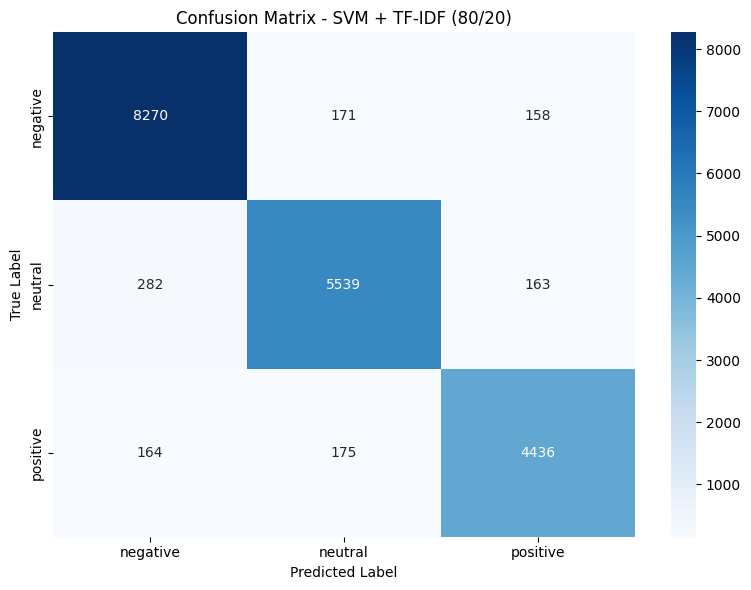

In [ ]:
con_matrix = confusion_matrix(y_test_20, y_pred_svm)
labels = label_encoder.classes_

# === Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - SVM + TF-IDF (80/20)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### Skema 2: TF-IDF + Random Forest (70/30)

In [23]:
start_time = time.time()

tfidf_vectorizer2 = TfidfVectorizer(max_features=5000)
X_train_tfidf2 = tfidf_vectorizer2.fit_transform(X_train_70)
X_test_tfidf2 = tfidf_vectorizer2.transform(X_test_30)

# Random Forest
rf_model_tfidf = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model_tfidf.fit(X_train_tfidf2, y_train_70)

# Evaluasi
y_pred_rf_tfidf = rf_model_tfidf.predict(X_test_tfidf2)
print("\nRandom Forest + TF-IDF (70/30)")
print(classification_report(y_test_30, y_pred_rf_tfidf, target_names=label_encoder.classes_))

end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"\nWaktu eksekusi: {minutes} menit {seconds} detik")


Random Forest + TF-IDF (70/30)
              precision    recall  f1-score   support

    negative       0.86      0.94      0.89     12958
     neutral       0.92      0.88      0.90      8889
    positive       0.88      0.79      0.83      7190

    accuracy                           0.88     29037
   macro avg       0.89      0.87      0.88     29037
weighted avg       0.88      0.88      0.88     29037


Waktu eksekusi: 5 menit 35 detik


Berdasarkan output di atas, model pelatihan Random Forest dengan ekstraksi fitur TF-IDF (Split 70/30) berhasil mencapai:
  - Akurasi tinggi sebesar 88%

  - Model memiliki presisi yang baik untuk semua kelas, terutama untuk kelas netral (0,92)

  - F1-skor yang cukup tinggi untuk semua kelas. Hal ini menunjukkan keseimbangan yang baik antara presisi dan recall untuk setiap sentimen

  - Recall untuk kelas negatif dan netral juga cukup tinggi (0,94 dan 0,88), menunjukkan bahwa model mampu mengidentifikasi sebagian besar instance dari kelas-kelas tersebut. Namun, recall untuk kelas positif sedikit lebih rendah (0,79), yang berarti model mungkin melewatkan beberapa teks yang sebenarnya positif

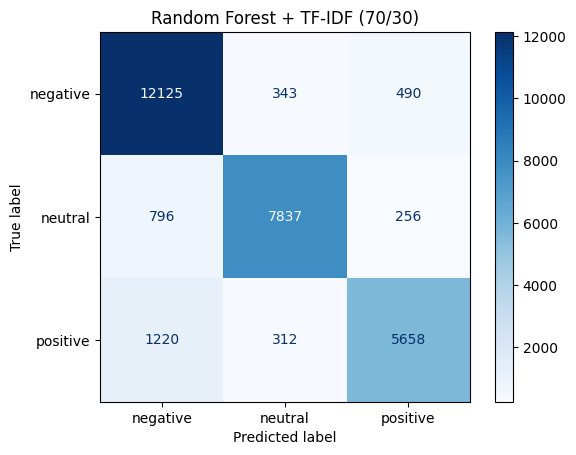

In [31]:
con_matrix = confusion_matrix(y_test_30, y_pred_rf_tfidf)
labels = label_encoder.classes_

# === Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest + TF-IDF (70/30)")
plt.show()


### Skema 3: TF-IDF + DNN (70/30)

Epoch 1/10
953/953 [==============================] - 21s 22ms/step - loss: 0.3717 - accuracy: 0.8553 - val_loss: 0.1798 - val_accuracy: 0.9362
Epoch 2/10
953/953 [==============================] - 22s 23ms/step - loss: 0.1607 - accuracy: 0.9458 - val_loss: 0.1604 - val_accuracy: 0.9452
Epoch 3/10
953/953 [==============================] - 21s 22ms/step - loss: 0.1154 - accuracy: 0.9624 - val_loss: 0.1652 - val_accuracy: 0.9454
Epoch 4/10
953/953 [==============================] - 21s 22ms/step - loss: 0.0883 - accuracy: 0.9723 - val_loss: 0.1687 - val_accuracy: 0.9463
Epoch 5/10
953/953 [==============================] - 22s 23ms/step - loss: 0.0752 - accuracy: 0.9776 - val_loss: 0.1812 - val_accuracy: 0.9448
Epoch 6/10
953/953 [==============================] - 26s 27ms/step - loss: 0.0591 - accuracy: 0.9826 - val_loss: 0.1917 - val_accuracy: 0.9438
Epoch 7/10
953/953 [==============================] - 20s 21ms/step - loss: 0.0530 - accuracy: 0.9851 - val_loss: 0.2007 - val_accuracy:

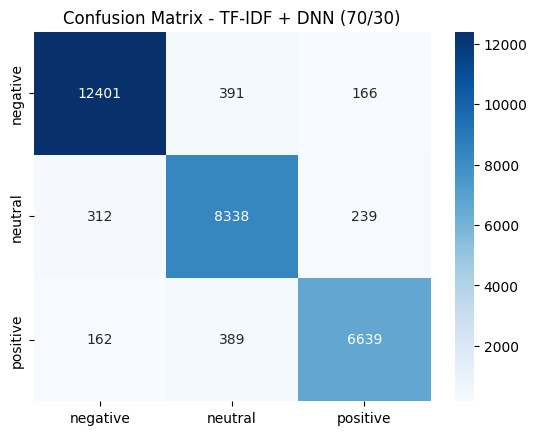


Waktu eksekusi: 4 menit 39 detik


In [19]:
start_time = time.time()

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf_70 = tfidf_vectorizer.fit_transform(X_train_70).toarray()
X_test_tfidf_30 = tfidf_vectorizer.transform(X_test_30).toarray()

dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_tfidf_70.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dnn_model.fit(X_train_tfidf_70, y_train_70, epochs=10, batch_size=64, verbose=1, validation_split=0.1)

y_pred_dnn = dnn_model.predict(X_test_tfidf_30)
y_pred_dnn_label = np.argmax(y_pred_dnn, axis=1)

print(classification_report(y_test_30, y_pred_dnn_label, target_names=label_encoder.classes_))

sns.heatmap(confusion_matrix(y_test_30, y_pred_dnn_label), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - TF-IDF + DNN (70/30)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"\nWaktu eksekusi: {minutes} menit {seconds} detik")

Berdasarkan output di atas, model pelatihan DNN dengan ekstraksi fitur TF-IDF (Split 70/30) berhasil mencapai:
  - Akurasi tinggi sebesar 94%

  - Performa konsisten di ketiga kelas (negative, neutral, positive) dengan f1-score rata-ratanya 0,94 yang artinya model cukup stabil dalam mengenali ketiga kelas (tidak bias ke salah satu kelas)

  - Distribusi data cukup seimbang sehingga macro avg ≈ weighted avg

# Inference (Testing)

In [41]:
def decode_label(preds):
    return label_encoder.inverse_transform(preds)

# Sample data untuk inference
sample_texts = [
    "Aplikasi vidio ini sangat membantu dan mudah digunakan!",    # Harusnya positif
    "Terlalu banyak iklan yang mengganggu.",                      # Harusnya negatif
    "Saya tidak tahu harus bilang apa."                           # Harusnya netral
]
# TF-IDF untuk inference - sesuai skema yang digunakan
sample_tfidf_svm = tfidf_vectorizer.transform(sample_texts)
sample_tfidf_rf = tfidf_vectorizer2.transform(sample_texts)
sample_tfidf_dnn = tfidf_vectorizer.transform(sample_texts).toarray()

# Skema 1: TF-IDF + SVM (Split 80/20)
pred_svm = decode_label(svm_model.predict(sample_tfidf_svm))
print("\nPrediksi (SVM + TF-IDF):", list(pred_svm))

# Skema 2: TF-IDF + Random Forest (70/30)
pred_rf = decode_label(rf_model_tfidf.predict(sample_tfidf_rf))
print("Prediksi (Random Forest + TF-IDF):", list(pred_rf))

# Skema 3: TF-IDF + DNN (70/30
pred_dnn = decode_label(np.argmax(dnn_model.predict(sample_tfidf_dnn), axis=1))
print("Prediksi (DNN + TF-IDF):", list(pred_dnn))


Prediksi (SVM + TF-IDF): ['positive', 'negative', 'neutral']
Prediksi (Random Forest + TF-IDF): ['negative', 'neutral', 'neutral']
1/1 [==============================] - 0s 22ms/step
Prediksi (DNN + TF-IDF): ['negative', 'neutral', 'neutral']
